## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike dataset

In [1]:
# Importing Relevant Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Bike data set

bike_df = pd.read_csv('day.csv')

In [3]:
# Checking the head of the dataset

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking total number of rows and coulumn's in the data set

bike_df.shape

(730, 16)

Inspect the various aspects of the housing dataframe

In [5]:
# checking for datatypes of columns or missing value of dataset

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking for null values in dataset

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Bike dataset contain any NULL and Missing Values

In [7]:
# Summarising statistics view of bike dataset

bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# After analyzing bikes dataset,we come to know there are some redundant variables like: 

# instant: Is an index column 
# dteday: Is redundant coz the required data for analysis is contained in mnth,yr 
# casual,registered: We know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
# so we are going to drop these all columns.

bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Visualising and Understanding the Data (EDA)

In [9]:
# Data Preparation

In [10]:
# Mapping all non-binary Categorical columns to their original values 

# list of non-binary categorical columns are season,weathersit,weekday,mnth

bike_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)


bike_df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow",4:'Heavy Rain_Ice Pallets'},inplace=True)


bike_df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)


bike_df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'},inplace=True)


bike_df.head(10)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


### Performing Univariate Analysis For Both Numerical & Categorical Variables 

cnt


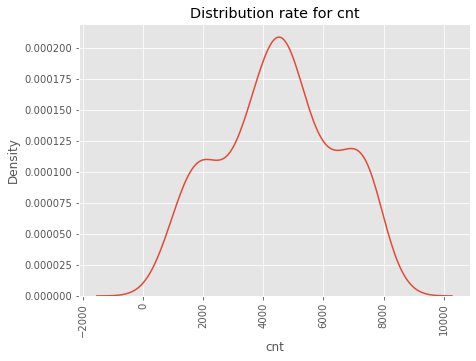

temp


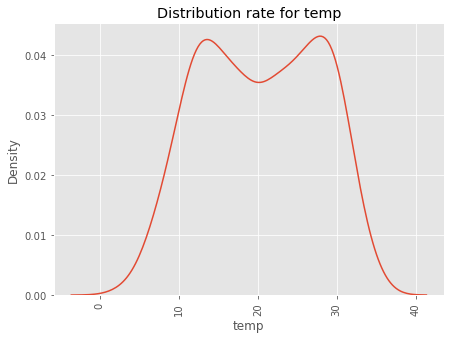

atemp


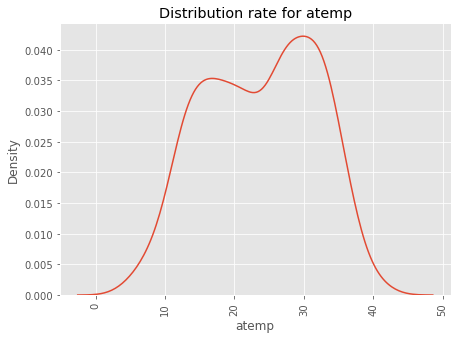

hum


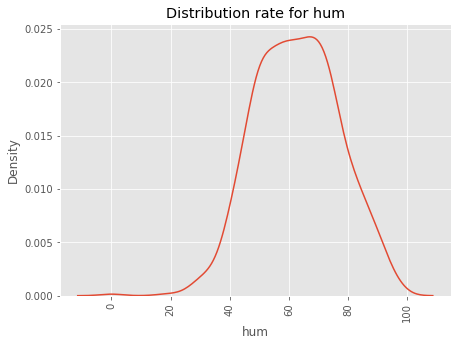

windspeed


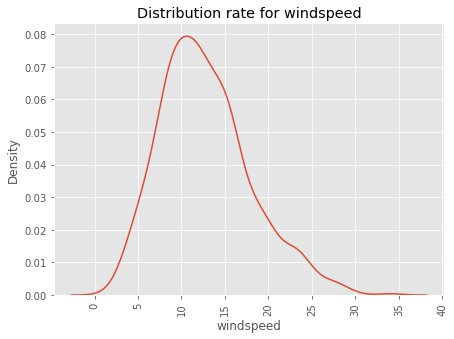

In [11]:
# Considering 5 Numerical coulmn for univariarte analysis.

cont_cols=['cnt','temp','atemp','hum','windspeed']

for i in cont_cols:
    print(i)
    plt.figure(figsize=(7,5))
    plt.style.use('ggplot')
    
    plt.title(f'Distribution rate for {i}')
    sns.distplot(bike_df[i],hist=False)
    plt.xticks(rotation=90)
    plt.show()
    
   

season


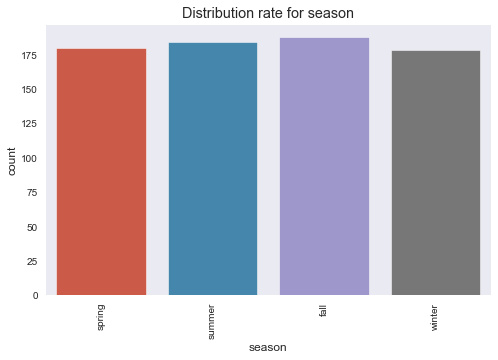

yr


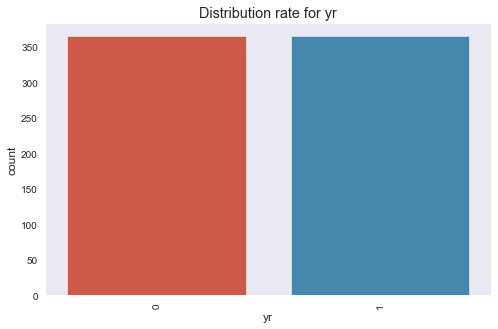

mnth


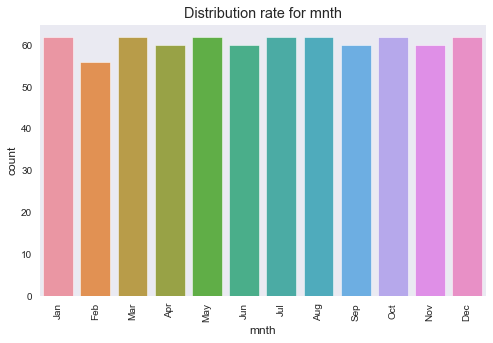

workingday


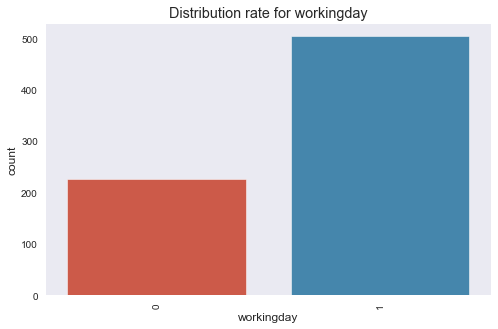

weathersit


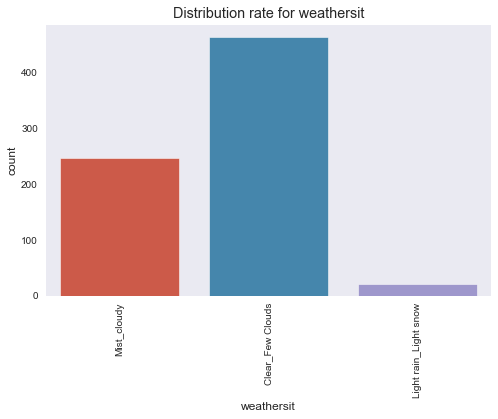

weekday


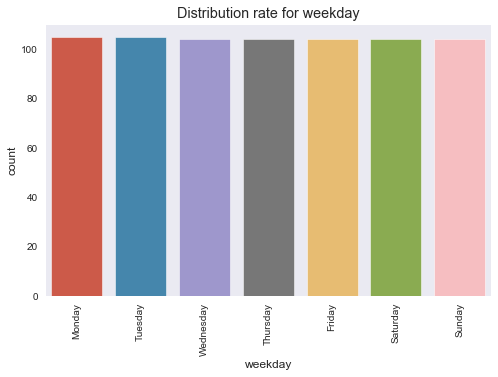

holiday


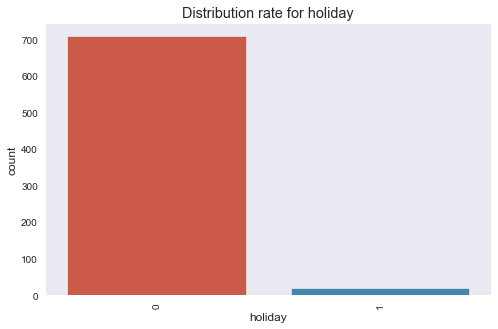

In [12]:
# Considering 7 Categoriccal column for univariate analysis.

cat_cols=['season','yr','mnth','workingday','weathersit','weekday','holiday']

for i in cat_cols:
    print(i)
    plt.figure(figsize=(8,5))
    sns.set_style('dark')
    
    plt.title(f'Distribution rate for {i}')
    sns.countplot(bike_df[i])
    plt.xticks(rotation=90)
    plt.show()
    

### Performing Bivariate Analysis For Both Numerical & Categorical Variables

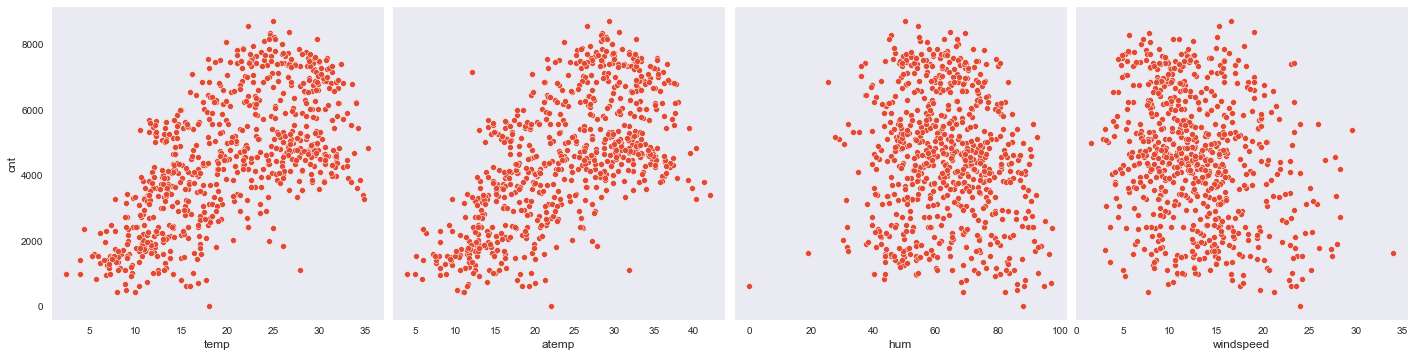

In [13]:
# Visualizing the continuous variables 'temp','atemp','humidity','windspeed' w.r.t 'cnt ' variable through a pairplot

sns.pairplot(data=bike_df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);
plt.show()

### Observation from above graph we can say that 
#### 1. A positive correlation with temp and atemp and therefore bike rental counts increase at higher temperatures and vice-versa

#### 2. A negative correlation with humidity,winspeed and therefore bike rental counts are less at high humidity and at high wind speed.


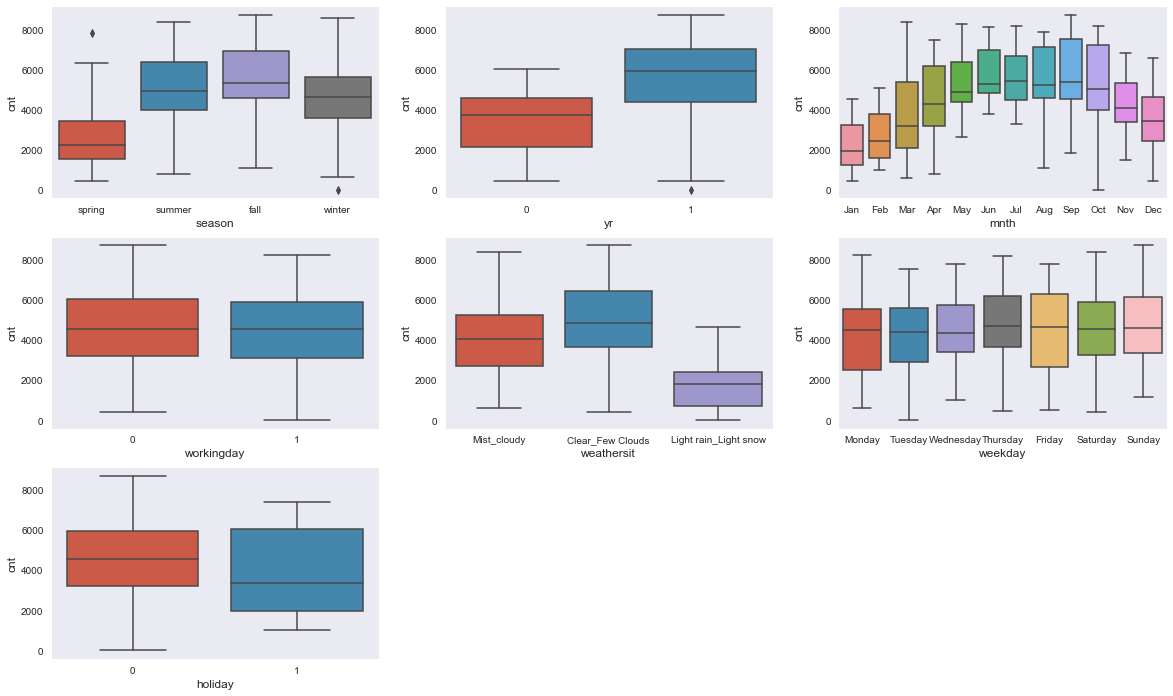

In [14]:
#Visualising categorical Variables to understand data better

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(data=bike_df, x='season', y='cnt')
plt.subplot(3,3,2)
sns.boxplot(data=bike_df, x = 'yr', y = 'cnt')
plt.subplot(3,3,3)
sns.boxplot(data=bike_df, x = 'mnth', y = 'cnt')
plt.subplot(3,3,4)
sns.boxplot(data=bike_df, x = 'workingday', y = 'cnt')
plt.subplot(3,3,5)
sns.boxplot(data=bike_df, x = 'weathersit', y = 'cnt')
plt.subplot(3,3,6)
sns.boxplot(data=bike_df, x = 'weekday', y = 'cnt')
plt.subplot(3,3,7)
sns.boxplot(data=bike_df, x = 'holiday', y = 'cnt')
plt.show()



#### Season vs Cnt : Fall has the highest average rentals followed by summer.
#### Yr vs Cnt :  2019 year had a median value increased upto 6000 in rentals compared to 2018, Hence Bikes rented are more in the year 2019 as compared to 2018.
#### Mnth vs Cnt: Bikes rented are more in the month of  September,  followed by the two months surrounding it. It seems like the trend is explained by seasonal rentals too.
#### Workingday vs Cnt: Weekend and Holiday has equal meadian value so there is no significant difference between rentals on weekend and holiday.
#### Weathersit vs Cnt: Clear_Few Clouds weather shows highter rentals compare to other weather.
#### Weekday vs Cnt: There is no significant difference between weekdays, except that Thursdays and sundays have a higher variation in rentals than others.
#### Holiday vs Cnt: Holidays show lower rental count compared to working days.


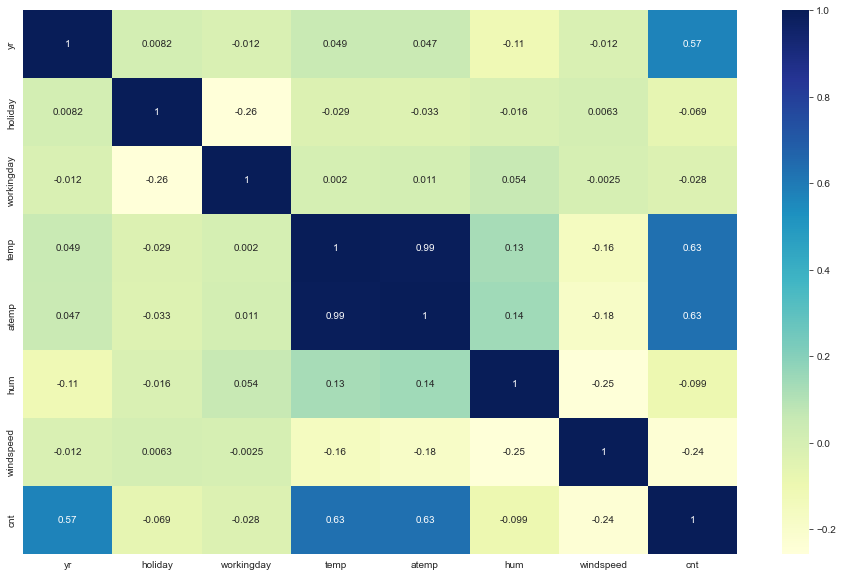

In [15]:
# Checking the Correlations among variables

plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [16]:
# From above map we can conclude that variables 'temp' and 'atemp' have a high correlation value of 0.99 , ie., they are highly correlated to each other , therefore we need to drop one of them .
bike_df.drop(['atemp'],axis=1,inplace=True)

In [17]:
# Creating Dummy Variables for the Categorical variables 


seasons = pd.get_dummies(bike_df['season'],drop_first=True)

weather= pd.get_dummies(bike_df['weathersit'],drop_first=True)

weekdays= pd.get_dummies(bike_df['weekday'],drop_first=True)

months= pd.get_dummies(bike_df['mnth'],drop_first=True)



In [18]:
# Concat the dummy df with the originl one

bike_df = pd.concat([bike_df,seasons,weather,weekdays,months], axis = 1)
bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Monday,1,Mist_cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,1,Mist_cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [19]:
# Dropping the orginal columns season,weathersit,weekday,mnth

bike_df.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)

bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# Step 3: Splitting the Data into Training and Testing Sets

In [20]:
# Importing lib and Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
# checking the shape of the train dataset.
bike_train.shape

(510, 29)

In [22]:
# checking the shape of the test dataset.
bike_test.shape

(219, 29)

# Rescaling the Features

In [23]:
# For Scaling the features in our bikes dataset , we will use MinMax scaling.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [24]:
# Applying Scaling on the continuous columns, except the 'target' and 'dummy' variables

num_var = ['temp','hum','windspeed']
bike_train[num_var] = scaler.fit_transform(bike_train[num_var])

bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Dividing data into X and Y sets for the model building

In [25]:
# Dividing data into X and Y sets

y_train = bike_train.pop('cnt')
X_train = bike_train

In [26]:
# Reading the y_train data set
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [27]:
# Reading the X_train data set
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light rain_Light snow,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 4: Building A Linear Model

- We will be using both automated and mannual approach,  
- Firstly we will select 15 variables by using the RFE ('Recursive feature elimination') 
- Then P-values and VIF  method is followed for further elimination of variables one by one.

In [28]:
# Importing RFE and LinearRegression lib

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
# Running RFE with the output  number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15, step=1)          # running RFE,
rfe = rfe.fit(X_train, y_train)


In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light rain_Light snow', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1)]

In [31]:
# Assigning RFE supported variable to train col to buil the liner model
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light rain_Light snow', 'Mist_cloudy', 'Dec', 'Jan', 'Jul',
       'Nov', 'Sep'],
      dtype='object')

In [32]:
#Listing out non supported variable by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

# Model-1

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [34]:
# Adding a constant variable 
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          3.34e-189
Time:                        19:47:15   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2805.55

- #### From above model-1, according to the pvalues, all the variables are significant. So Now will calculate VIF of the variables to find if any multicollinearity exists betweeen any variable.

In [35]:
# Calculate the VIFs for the new model-1
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.93
14,Nov,1.76
12,Jan,1.68
10,Mist_cloudy,1.57
11,Dec,1.49


- #### From above VIF table we can see VIF value for the variable 'spring' is high so we are going to drop spring variable.

In [36]:
# Dropping the 'spring' variable
X_train_new = X_train_rfe.drop(["spring"], axis = 1)

# Model-2

In [37]:
# Rebuilding the model without 'spring' variable.

# Adding a constant variable 

import statsmodels.api as sm  

X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.54e-188
Time:                        19:47:16   Log-Likelihood:                -4115.4
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2249.6749    249.969      9.000      0.000    1758.545    2740.805
yr                     1989.9481     70.622     28.178      0.000    1851.193    2128.704
holiday                -823.4374    223.790     -3.680      0.000   -1263.133    -383.742
temp                   4815.7051    234.798     20.510      0.000    4354.382    5277.028
hum                   -1497.7136    328.928     -4.553      0.000   -2143.981    -851.446
windspeed             -1711.8331    224.253     -7.633      0.000   -2152.439   -1271.227
summer                  622.5274     96.917      6.423      0.000     432.107     812.948
winter                 1205.7092    115.803     10.412      0.000     978.184    1433.235
Light rain_Light snow -2101.7053    230.320     -9.125      0.000   -2554.231   -1649.180
Mist_cloudy            -460.4370     91.247     -5.046      0.000    -639.716    -281.158
Dec                    -271.1494    151.805     -1.786      0.075    -569.412      27.113
Jan                    -413.5337    158.247     -2.613      0.009    -724.452    -102.615
Jul                    -394.6901    156.604     -2.520      0.012    -702.381     -86.999
Nov                    -269.8860    161.233     -1.674      0.095    -586.671      46.899
Sep                     780.9830    140.741      5.549      0.000     504.460    1057.506
==============================================================================
Omnibus:                       58.853   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.887
Skew:                          -0.650   Prob(JB):                     1.25e-27
Kurtosis:                       5.034   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### From above above model-2 summary we can see P-value for 'Nov' variable is more than 0.05, So we are going to drop 'Nov' variable

In [38]:
# Dropping the 'Nov' variable
X_train_new = X_train_new.drop(["Nov"], axis = 1)

# Model-3

In [39]:
# Rebuilding the model without 'Nov' variable.

# Adding a constant variable 

import statsmodels.api as sm  

X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          4.25e-189
Time:                        19:47:16   Log-Likelihood:                -4116.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2193.6594    248.168      8.839      0.000    1706.069    2681.249
yr                     1990.2655     70.750     28.131      0.000    1851.259    2129.272
holiday                -865.9135    222.750     -3.887      0.000   -1303.564    -428.263
temp                   4885.5868    231.476     21.106      0.000    4430.793    5340.381
hum                   -1492.8551    329.512     -4.530      0.000   -2140.267    -845.443
windspeed             -1711.3618    224.660     -7.618      0.000   -2152.765   -1269.959
summer                  632.7788     96.899      6.530      0.000     442.395     823.162
winter                 1107.8850    100.156     11.062      0.000     911.103    1304.667
Light rain_Light snow -2078.7469    230.329     -9.025      0.000   -2531.287   -1626.207
Mist_cloudy            -457.1343     91.391     -5.002      0.000    -636.696    -277.573
Dec                    -174.5961    140.674     -1.241      0.215    -450.987     101.795
Jan                    -375.3064    156.875     -2.392      0.017    -683.527     -67.086
Jul                    -403.3223    156.803     -2.572      0.010    -711.403     -95.242
Sep                     805.6409    140.222      5.745      0.000     530.139    1081.143
==============================================================================
Omnibus:                       55.375   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.484
Skew:                          -0.624   Prob(JB):                     2.28e-25
Kurtosis:                       4.945   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### From above above model-3 summary we can see P-value for 'Dec' variable is more than 0.05, So we are going to drop 'Dec' variable

In [40]:
# Dropping the 'Dec' variable
X_train_new = X_train_new.drop(["Dec"], axis = 1)

# Model-4

In [41]:
# Rebuilding the model without 'Dec' variable.

# Adding a constant variable 

import statsmodels.api as sm  

X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          6.03e-190
Time:                        19:47:16   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2145.9539    245.307      8.748      0.000    1663.988    2627.920
yr                     1989.6797     70.787     28.108      0.000    1850.602    2128.758
holiday                -856.6581    222.747     -3.846      0.000   -1294.299    -419.017
temp                   4969.0281    221.618     22.422      0.000    4533.605    5404.452
hum                   -1532.8724    328.109     -4.672      0.000   -2177.525    -888.220
windspeed             -1690.3369    224.142     -7.541      0.000   -2130.720   -1249.953
summer                  647.4056     96.232      6.728      0.000     458.334     836.478
winter                 1093.8858     99.573     10.986      0.000     898.250    1289.522
Light rain_Light snow -2053.4327    229.549     -8.946      0.000   -2504.438   -1602.428
Mist_cloudy            -450.7975     91.298     -4.938      0.000    -630.175    -271.420
Jan                    -330.4766    152.743     -2.164      0.031    -630.578     -30.376
Jul                    -409.5862    156.807     -2.612      0.009    -717.673    -101.500
Sep                     818.1271    139.936      5.846      0.000     543.187    1093.067
==============================================================================
Omnibus:                       53.475   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.257
Skew:                          -0.609   Prob(JB):                     3.11e-24
Kurtosis:                       4.900   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.60
3,temp,2.06
4,hum,1.88
9,Mist_cloudy,1.55
10,Jan,1.55
7,winter,1.53
11,Jul,1.43
6,summer,1.41
8,Light rain_Light snow,1.24
5,windspeed,1.19


- #### From above above model-4 summary and VIF value, we can see P-value for 'Jan' variable is slightly high and VIF is low, So we are going to drop 'Jan' variable.

In [43]:
# Dropping the 'Jan' variable
X_train_new = X_train_new.drop(["Jan"], axis = 1)

# Model-5

In [44]:
# Rebuilding the model without 'Dec' variable.

# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

# Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          3.89e-190
Time:                        19:47:16   Log-Likelihood:                -4120.0
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     498   BIC:                             8315.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1984.0721    234.480      8.462      0.000    1523.381    2444.763
yr                     1981.2753     70.941     27.929      0.000    1841.895    2120.655
holiday                -864.1531    223.541     -3.866      0.000   -1303.353    -424.953
temp                   5195.6518    196.024     26.505      0.000    4810.516    5580.788
hum                   -1586.7212    328.371     -4.832      0.000   -2231.885    -941.558
windspeed             -1644.5414    223.964     -7.343      0.000   -2084.572   -1204.511
summer                  698.3684     93.649      7.457      0.000     514.372     882.365
winter                 1179.7188     91.666     12.870      0.000     999.619    1359.818
Light rain_Light snow -2026.4999    230.056     -8.809      0.000   -2478.501   -1574.499
Mist_cloudy            -449.3567     91.632     -4.904      0.000    -629.390    -269.323
Jul                    -418.2280    157.335     -2.658      0.008    -727.349    -109.107
Sep                     833.8751    140.262      5.945      0.000     558.296    1109.454
==============================================================================
Omnibus:                       52.347   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.891
Skew:                          -0.598   Prob(JB):                     1.01e-23
Kurtosis:                       4.885   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
4,hum,1.87
3,temp,1.60
9,Mist_cloudy,1.55
10,Jul,1.43
6,summer,1.33
7,winter,1.29
8,Light rain_Light snow,1.24
11,Sep,1.19
5,windspeed,1.18


#### From the above model-5 ,we can see that 
- #### All the 11 features are statistically significant, has low VIF and p-value.
- #### The model over is a good fit with Prob (F-statistic): 3.89e-190
- #### The model explains 84.0% variability in the training data. Adjusted R-square being 83.6%
#### So we consider Model-5 is our Final Model.

# Step 5: Residual Analysis Of The Train Data:

Text(0.5, 0, 'Errors')

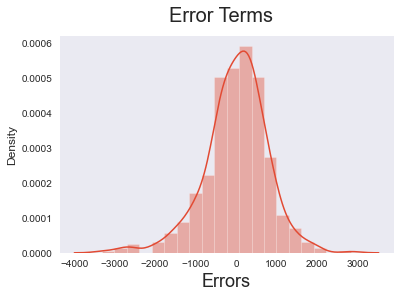

In [46]:
#Checking residual analysis for train data
y_train_cnt = lm.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Text(0, 0.5, 'y_train_cnt')

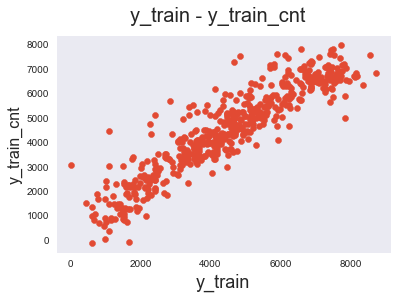

In [47]:
# Plotting y_train and y_train_cnt to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_cnt)
fig.suptitle('y_train - y_train_cnt', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_cnt', fontsize=16)  

Observation:
- Residual errors follow a normal distribution with mean=0.
- Variance of Errors doesnt follow any trends.

Hence, assumptions of Linear Regression are satisfied by this model-5

# Step 6: Making Predictions Using The Final Model:

In [48]:
# Applying the scaling on the test sets
num_var = ['temp','hum','windspeed']

bike_test[num_var] = scaler.transform(bike_test[num_var])

bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,4546.981735,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,1898.633630,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,5869.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Dividing into X_test and y_test

In [50]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [51]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [52]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [53]:
# Making predictions on the chosen model

y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

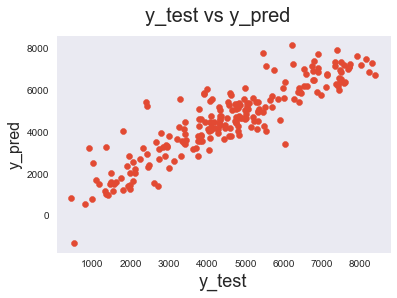

In [54]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

The actual and predicted cnt i.e demand significantly overlapped,and predicted values have a linear relationship with actual values thus indicating that the model is able to explain the change in demand very well.

# Step 7: Model Evaluation:

In [55]:
# Comparing R-square and Adjusted value for both Train and Test datasets.

R-squared Value for:

- #### Train set: 84.0%
- #### Test set : 80.4%

Adj. R-squared for:

- #### Train set: 83.6%
- #### Test set : 79.2%

As we can see that the difference between the R-squared and Adj. R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model .

### Reporting the Final Model:

From the final regression model-5 above, we have the following variables and their coefficients which are significant in predicting the demand for shared bikes:

- yr = 1981.2753
- holiday = -864.1531
- temp = 5195.6518
- hum = -1586.7212
- windspeed = -1644.5414
- summer = 698.3684
- winter = 1179.7188
- Light rain_Light snow = -2026.4999
- Mist_cloudy = -449.3567
- Jul = -418.2280
- Sep = 833.8751

### The final equation and relationship between demand and predictors is as follows.

### cnt = 1984.0721 + 1981.2753 x yr - 864.1531 x holiday + 5195.6518 x temp - 1586.7212 x hum - 1644.5414 x windspeed + 698.3684 x summer + 1179.7188 x winter - 2026.4999 x Light rain_Light snow - 449.3567 x Mist_cloudy - 418.2280 x Jul + 833.8751 x Sep  

### Conclusion

- #### There for we can say that demand for shared bikes depends on mainly : 'yr','holiday','temp','hum','windspeed','summer','winter','Light rain_Light snow','Mist_cloudy','Jul,'Sep'.

- #### A positive coefficient represents, Demands will increases if we consider following variables : 'yr','temp','summer','winter','Sep'.

- #### A negative coefficient represents, Demands will decreases if we consider following variables : 'holiday','hum','windspeed','Light rain_Light snow','Mist_cloudy','Jul'.